# **Train a multiclass classification model. Perform EDA and try to understand the data especially the traits of each class, preprocess the data, train, evaluate the model and analyze the results!**

# **EDA**

In [1]:
#Import Library

import pandas as pd
import numpy as np
from tqdm import tqdm
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
df.tail()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B
8067,461879,Male,Yes,37,Yes,Executive,0.0,Average,3.0,Cat_4,B


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


Melihat info detail dari dataset yang kita punya seperti tipe data dari setiap kolom, jumlah nilai yang tidak kosong, dan penggunaan memori

In [5]:
summary_stats = df.describe()
summary_stats

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


menghitung statistik deskriptif untuk setiap kolom numerik

In [6]:
#Melihat data apa saja yang hilang
miss_values = df.isna().sum()
miss_values

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


dari hasil diatas kita bisa lihat bahwa ada 140 data hilang di kolom Ever_Married, ada 78 data hilang di kolom Graduated, ada 124 data hilang di kolom Profession, ada 829 data hilang di kolom Work_Experience, ada 335 data hilang di kolom Family_Size dan ada 76 data hlang di kolom Var_1

In [7]:
#Menghapus data yang hilang
df.dropna(inplace=True)

Disini kita menghapus data yang hilang karena jumlahnya relatif sedikit, sehingga tidak akan berdampak signifikan pada keutuhan data secara keseluruhan



In [8]:
df.isna().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


check missing value sudah dihilangkan

In [9]:
df.nunique()

,0
ID,6665
Gender,2
Ever_Married,2
Age,67
Graduated,2
Profession,9
Work_Experience,15
Spending_Score,3
Family_Size,9
Var_1,7


Untuk kita bisa melihat ada berapa banyak variasi data di setiap kolom data, sejauh ini dari data yang kita bisa lihat datanya masih normal, variasi data dengan topik kolom yang ada masih sesuai, tidak ada anomali

In [10]:
#Melihat duplicate data
df.duplicated().sum()

0

Tidak ada duplikasi data


In [12]:
# Memisahkan kolom numerik dan kategorikal menggunakan fungsi select_dtypes dari pandas

# Mengambil kolom numerik
num_columns = df.select_dtypes(include=['number']).columns.tolist()

# Mengambil kolom kategorikal
category_columns = df.select_dtypes(exclude=['number']).columns.tolist()

# Menampilkan kolom-kolom kategorikal dan numerik
print(f'Categorical: {category_columns}')
print(f'Numeric: {num_columns}')


Categorical: ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']
Numeric: ['ID', 'Age', 'Work_Experience', 'Family_Size']


menggunakan fungsi select_dtypes dari pandas untuk memisahkan kolom dalam DataFrame df menjadi dua kategori, yaitu kolom numerik yang disimpan dalam daftar num_columns dan kolom kategorikal yang disimpan dalam daftar category_columns

In [13]:
for i in category_columns:
    print(df[i].value_counts(),'\n')

Gender
Male      3677
Female    2988
Name: count, dtype: int64 

Ever_Married
Yes    3944
No     2721
Name: count, dtype: int64 

Graduated
Yes    4249
No     2416
Name: count, dtype: int64 

Profession
Artist           2192
Healthcare       1077
Entertainment     809
Doctor            592
Engineer          582
Executive         505
Lawyer            500
Marketing         233
Homemaker         175
Name: count, dtype: int64 

Spending_Score
Low        3999
Average    1662
High       1004
Name: count, dtype: int64 

Var_1
Cat_6    4476
Cat_4     849
Cat_3     634
Cat_2     362
Cat_7     166
Cat_1     104
Cat_5      74
Name: count, dtype: int64 

Segmentation
D    1757
C    1720
A    1616
B    1572
Name: count, dtype: int64 



menampilkan distribusi frekuensi jumlah kemunculan dari setiap nilai unik pada kolom-kolom kategorikal dalam dataset

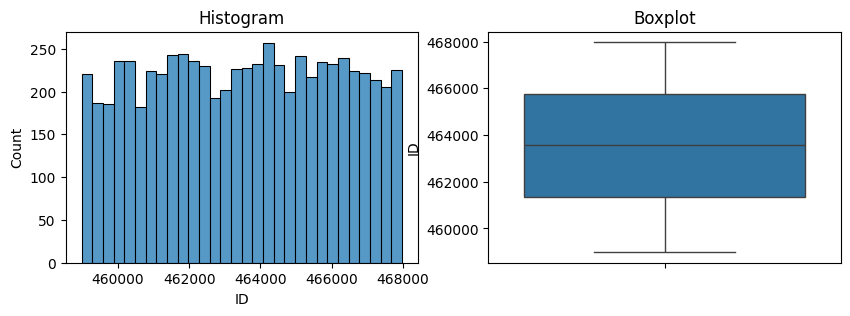

Skewness: -0.0191283063183897
Kurtosis: -1.1795459252920404


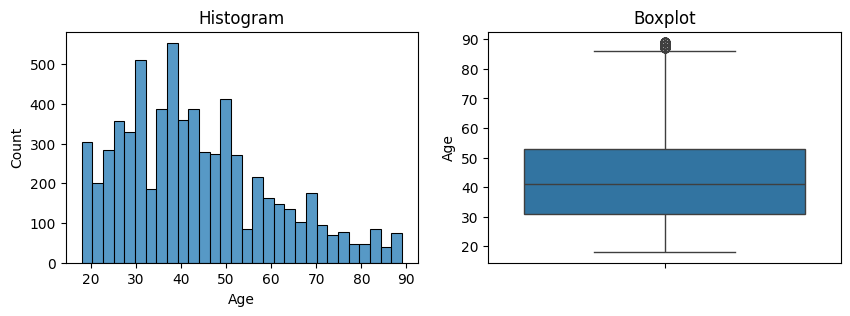

Skewness: 0.684859998741693
Kurtosis: -0.14057082136367827


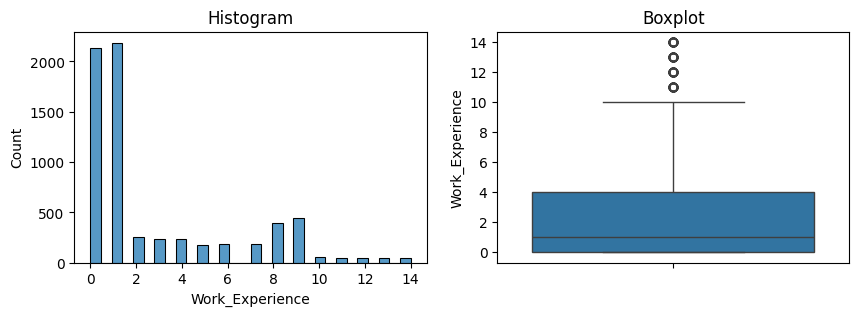

Skewness: 1.3243597752021483
Kurtosis: 0.5842980395343771


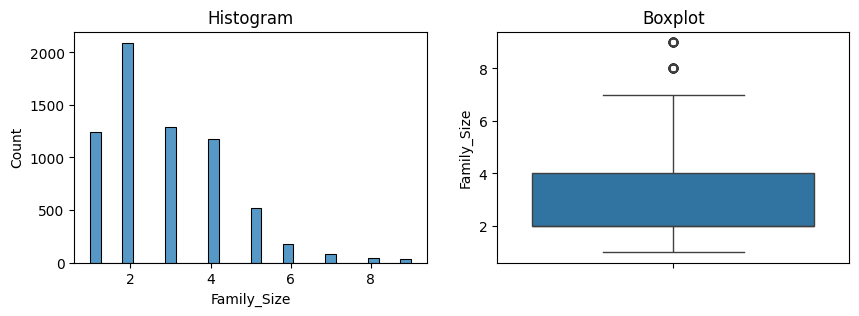

Skewness: 1.0258856078867193
Kurtosis: 1.3161235593745664


In [14]:
# Check outlier and distribution
def check_distribution_numeric(df, columns):
    for i in columns:
        plt.figure(figsize=(10, 3))

        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(df[i], bins=30)
        plt.title('Histogram')

        # Boxplot
        plt.subplot(1, 2, 2)
        sns.boxplot(y=df[i])
        plt.title('Boxplot')

        plt.show()

        print('Skewness:', df[i].skew())
        print('Kurtosis:', df[i].kurt())

check_distribution_numeric(df[num_columns], num_columns)

dari data diatas kita bisa lihat bahwa data sudah terdistribusi dengan
baik, dan tidak ada data outlier yang harus kita ganti atau ubah

<ipython-input-15-5db4d69845de>:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1 = df1.replace(encoding_map)


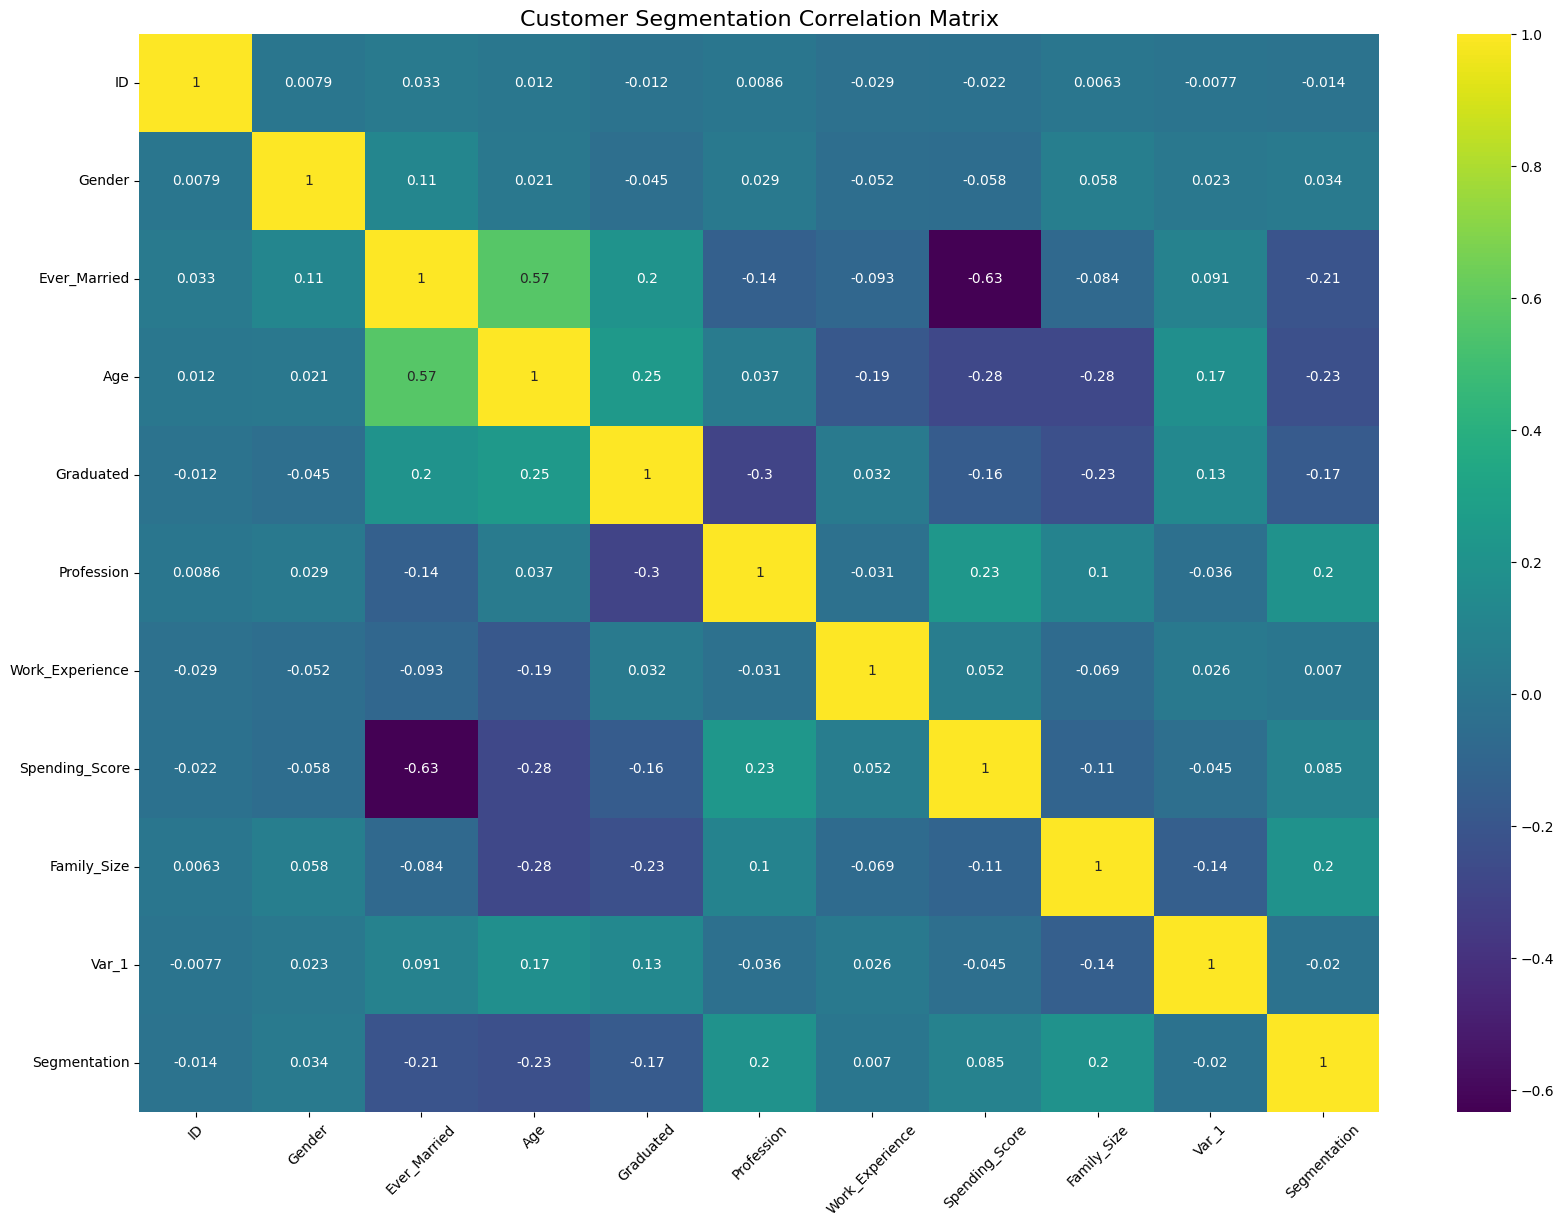

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Data preparation
df1 = df.copy()

# Encoding categorical variables
encoding_map = {
    "Gender": {"Male": 1, "Female": 0},
    "Ever_Married": {"Yes": 1, "No": 0},
    "Graduated": {"Yes": 1, "No": 0}
}
# Apply replacement without inplace
df1 = df1.replace(encoding_map)

# Label encoding for remaining categorical columns
label_encoder = LabelEncoder()
for col in ["Profession", "Spending_Score", "Var_1", "Segmentation"]:
    df1[col] = label_encoder.fit_transform(df1[col])

# Generate correlation matrix
correlation_matrix = df1.corr()

# Plot heatmap
plt.figure(figsize=(20, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Customer Segmentation Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.show()


dari grafik diatas dapat disimpulkan bahwa variabel Age memiliki hubungan positif terbesar dengan variabel Ever Married (nilai korelasi sebesar 0.57), sedangkan variabel Ever_Married memiliki hubungan negatif terbesar dengan Spending_Score (nilai korelasi sebesar -0.63)

<Figure size 1500x1000 with 0 Axes>

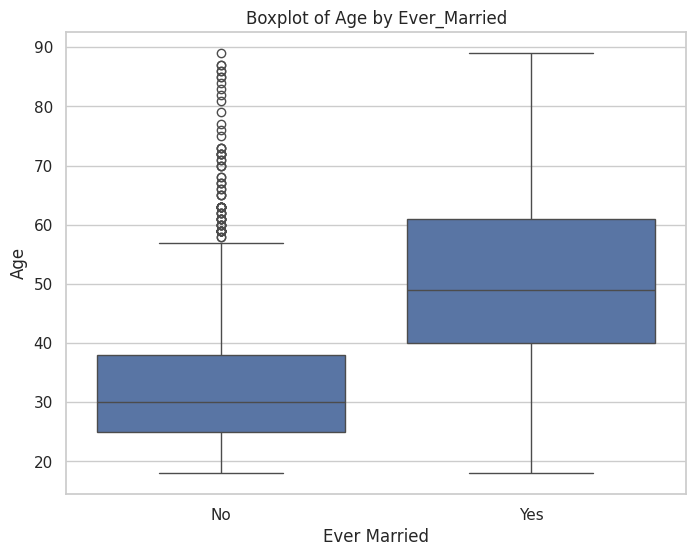

In [16]:
# Set up the figure size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Plot 1: Distribution of Age by Ever_Married
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Ever_Married", y="Age")
plt.title('Boxplot of Age by Ever_Married')
plt.xlabel('Ever Married')
plt.ylabel('Age')
plt.show()



Melihat distribusi dengan korelasi tertinggi dari heat map tadi

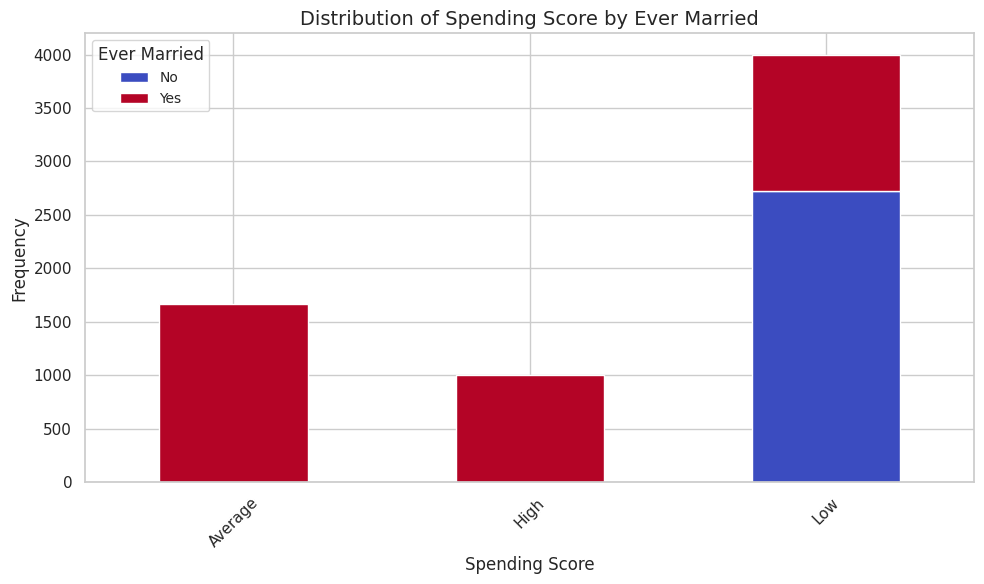

In [17]:
# 1. Hitung jumlah Spending_Score per kategori
spending_score_summary = df['Spending_Score'].value_counts().reset_index()
spending_score_summary.columns = ['Spending_Score', 'Frequency']

# 2. Buat Pivot Table untuk distribusi kategori Ever_Married
spending_score_pivot = df.pivot_table(index='Spending_Score',
                                      columns='Ever_Married',
                                      aggfunc='size',
                                      fill_value=0)

# 3. Visualisasi dengan Stacked Bar Chart
spending_score_pivot.plot(kind='bar',
                          stacked=True,
                          figsize=(10, 6),
                          colormap="coolwarm")

# 4. Tambahkan label dan judul
plt.xlabel('Spending Score', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Spending Score by Ever Married', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Ever Married", loc='best', fontsize=10)
plt.tight_layout()
plt.show()


Melihat distribusi dengan korelasi terendah dari heat map tadi

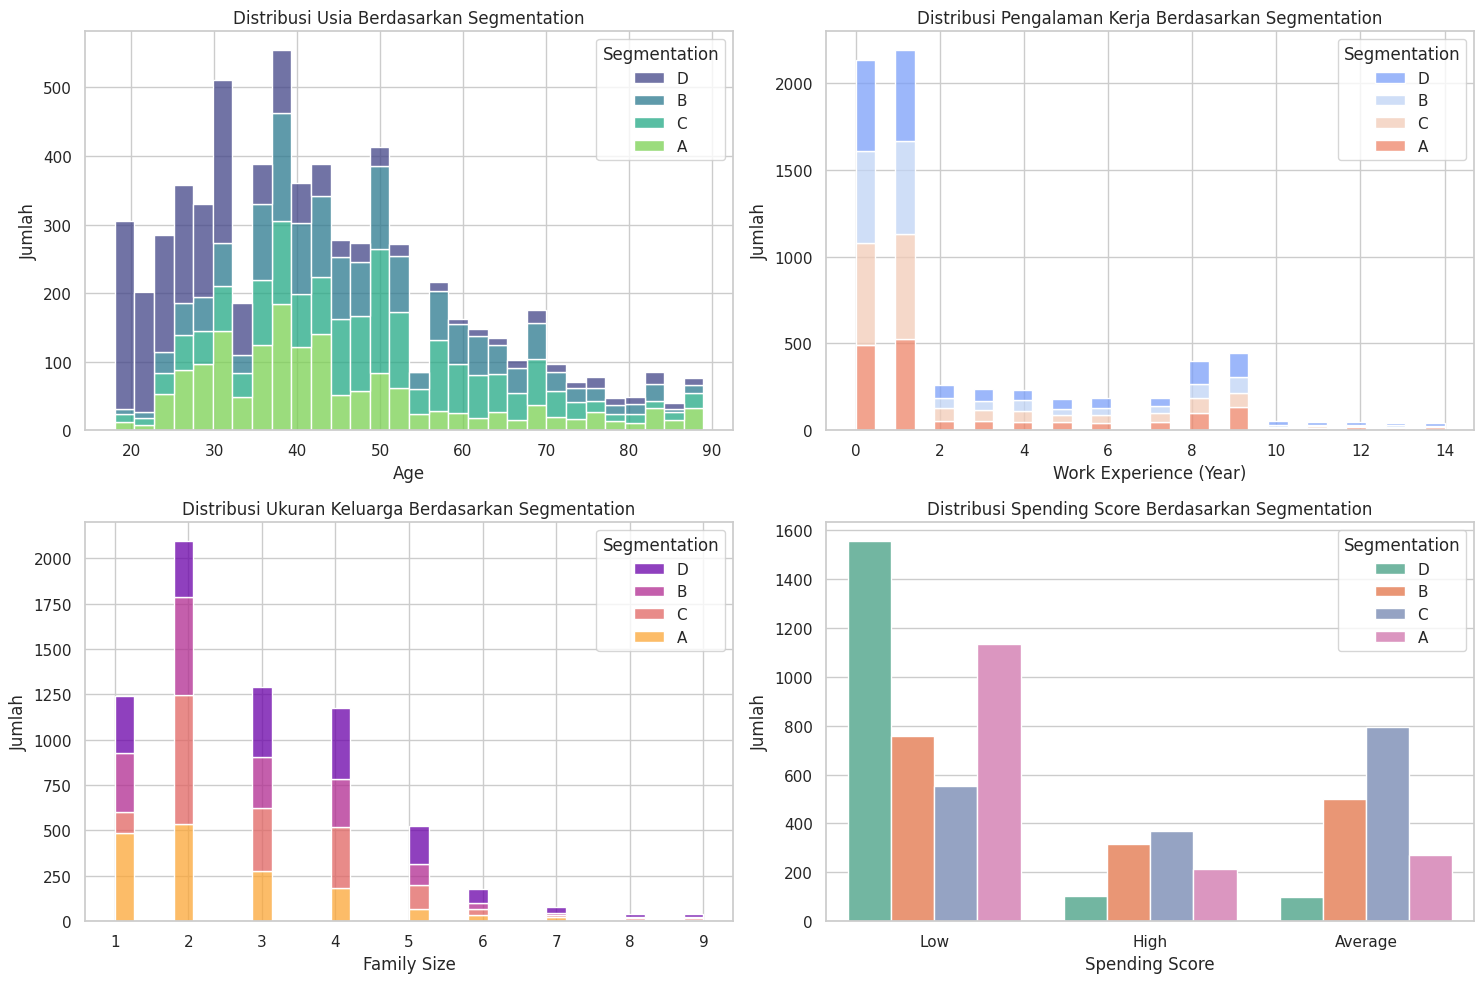

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size and style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Plot 1: Distribution of Age by Segmentation
plt.subplot(2, 2, 1)
sns.histplot(df, x="Age", hue="Segmentation", multiple="stack", bins=30, palette="viridis")
plt.title('Distribusi Usia Berdasarkan Segmentation')
plt.xlabel('Age')
plt.ylabel('Jumlah')

# Plot 2: Distribution of Work Experience by Segmentation
plt.subplot(2, 2, 2)
sns.histplot(df, x="Work_Experience", hue="Segmentation", multiple="stack", bins=30, palette="coolwarm")
plt.title('Distribusi Pengalaman Kerja Berdasarkan Segmentation')
plt.xlabel('Work Experience (Year)')
plt.ylabel('Jumlah')

# Plot 3: Distribution of Family Size by Segmentation
plt.subplot(2, 2, 3)
sns.histplot(df, x="Family_Size", hue="Segmentation", multiple="stack", bins=30, palette="plasma")
plt.title('Distribusi Ukuran Keluarga Berdasarkan Segmentation')
plt.xlabel('Family Size')
plt.ylabel('Jumlah')

# Plot 4: Distribution of Spending Score by Segmentation
plt.subplot(2, 2, 4)
sns.countplot(df, x="Spending_Score", hue="Segmentation", palette="Set2")
plt.title('Distribusi Spending Score Berdasarkan Segmentation')
plt.xlabel('Spending Score')
plt.ylabel('Jumlah')

# Adjust layout
plt.tight_layout()
plt.show()


1. Distribusi Usia Berdasarkan Segmentation:

- Segmentasi A dan B memiliki distribusi usia yang lebih merata di berbagai kelompok umur.
- Segmentasi C dan D cenderung lebih terkonsentrasi pada usia yang lebih muda (20-40 tahun).


2. Distribusi Pengalaman Kerja Berdasarkan Segmentation:

- Sebagian besar individu di semua segmentasi memiliki pengalaman kerja yang rendah (0-2 tahun).
- Segmentasi D mendominasi individu dengan pengalaman kerja sangat rendah (0 tahun).
- Segmentasi B memiliki distribusi pengalaman kerja yang lebih tersebar, termasuk untuk pengalaman kerja yang lebih lama (di atas 10 tahun).


3. Distribusi Ukuran Keluarga Berdasarkan Segmentation:

- Segmentasi D memiliki banyak individu dengan ukuran keluarga besar (5 anggota ke atas).
- Segmentasi A dan B cenderung memiliki ukuran keluarga yang lebih kecil (1-3 anggota).


4. Distribusi Spending Score Berdasarkan Segmentation:

- Segmentasi A lebih dominan pada pengeluaran kategori "Average" (rata-rata).
- Segmentasi D cenderung berada di kategori pengeluaran "Low".
- Segmentasi B memiliki distribusi yang relatif seimbang antara "High" dan "Average".

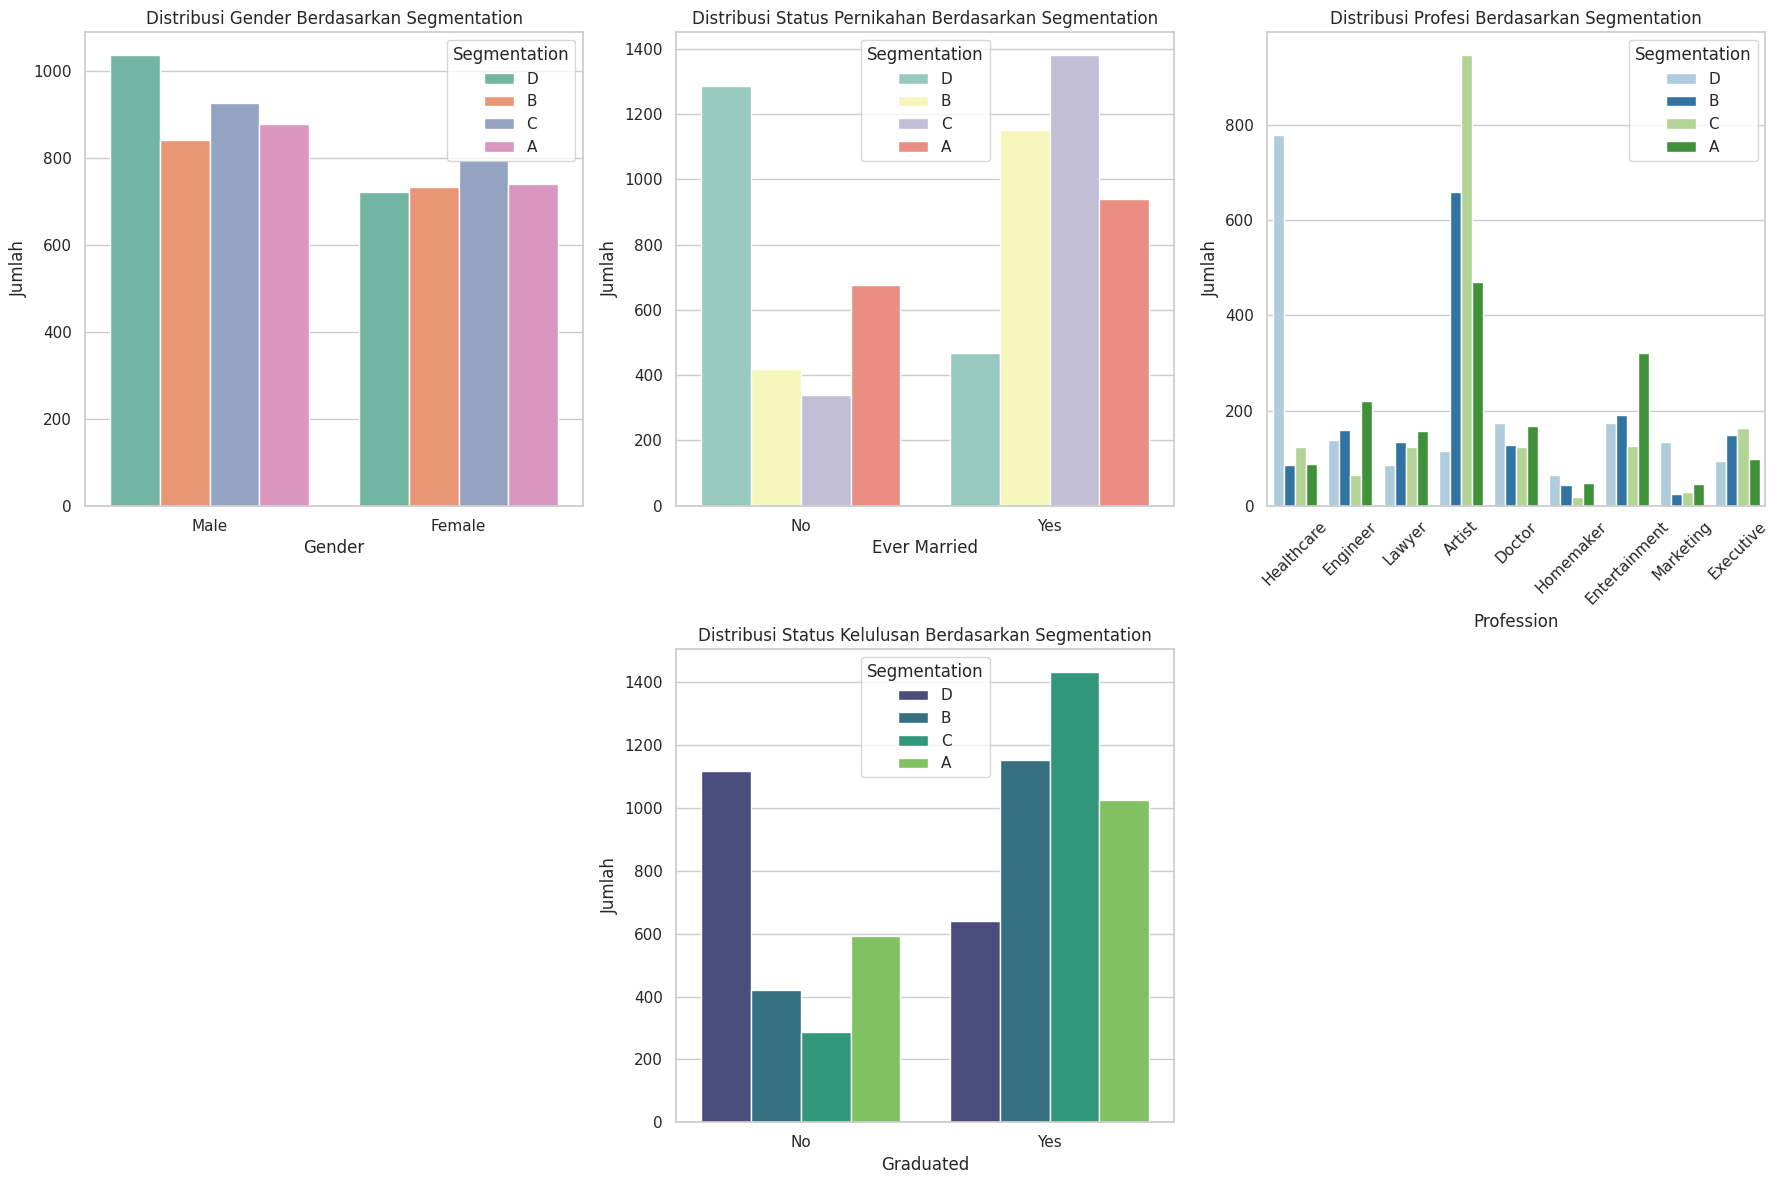

In [19]:
# Set up the figure size and style
plt.figure(figsize=(18, 12))
sns.set(style="whitegrid")

# Plot 1: Distribution of Gender by Segmentation
plt.subplot(2, 3, 1)
sns.countplot(df, x="Gender", hue="Segmentation", palette="Set2")
plt.title('Distribusi Gender Berdasarkan Segmentation')
plt.xlabel('Gender')
plt.ylabel('Jumlah')

# Plot 2: Distribution of Ever Married by Segmentation
plt.subplot(2, 3, 2)
sns.countplot(df, x="Ever_Married", hue="Segmentation", palette="Set3")
plt.title('Distribusi Status Pernikahan Berdasarkan Segmentation')
plt.xlabel('Ever Married')
plt.ylabel('Jumlah')

# Plot 3: Distribution of Profession by Segmentation
plt.subplot(2, 3, 3)
sns.countplot(df, x="Profession", hue="Segmentation", palette="Paired")
plt.title('Distribusi Profesi Berdasarkan Segmentation')
plt.xlabel('Profession')
plt.ylabel('Jumlah')
plt.xticks(rotation=45)

# Plot 4: Distribution of Graduated by Segmentation
plt.subplot(2, 3, 5)
sns.countplot(df, x="Graduated", hue="Segmentation", palette="viridis")
plt.title('Distribusi Status Kelulusan Berdasarkan Segmentation')
plt.xlabel('Graduated')
plt.ylabel('Jumlah')

# Adjust layout
plt.tight_layout()
plt.show()


1. Distribusi Gender Berdasarkan Segmentasi:

- Gender "Male" lebih dominan dalam segmentasi D dibandingkan segmen lain.
- Gender "Female" memiliki distribusi yang lebih seimbang di semua segmentasi (A, B, C, dan D).

2. Distribusi Status Pernikahan Berdasarkan Segmentasi:

- Individu yang belum menikah ("No") lebih banyak terdapat di segmentasi D.
- Individu yang sudah menikah ("Yes") dominan di segmentasi B dan D.

3. Distribusi Profesi Berdasarkan Segmentasi:

- Profesi "Artist" mendominasi segmentasi A secara signifikan dibandingkan profesi lainnya.
- Profesi seperti "Lawyer", "Marketing", dan "Homemaker" memiliki distribusi yang lebih kecil di semua segmen.

4. Distribusi Status Kelulusan Berdasarkan Segmentasi:

- Individu yang telah lulus ("Graduated: Yes") lebih dominan di segmentasi C dan B.
- Individu yang belum lulus ("Graduated: No") lebih banyak terdapat di segmentasi D

# **Preprocess The Data**

In [20]:
# Remove the customer_id column
df = df.drop('ID', axis=1)

# Check if the column is removed
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


Meremove kolom ID karena ketika kita membuat model kita tidak membutuhkan kolom tersebut

In [21]:
# Mendefinisikan mapping untuk encoding nilai-nilai tertentu
encoding_map = {
    "Gender": {"Male": 1, "Female": 0},
    "Ever_Married": {"Yes": 1, "No": 0},
    "Graduated": {"Yes": 1, "No": 0}
}

# Mengganti nilai dalam dataset menggunakan mapping yang telah didefinisikan
df = df.replace(encoding_map)

# Menggunakan LabelEncoder dari scikit-learn untuk encoding kolom lainnya
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encoding kolom dengan nilai kategorikal
df['Profession'] = label_encoder.fit_transform(df['Profession'])
df['Spending_Score'] = label_encoder.fit_transform(df['Spending_Score'])
df['Var_1'] = label_encoder.fit_transform(df['Var_1'])
df['Segmentation'] = label_encoder.fit_transform(df['Segmentation'])

df.head()

<ipython-input-21-636ab70cfafa>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(encoding_map)


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,22,0,5,1.0,2,4.0,3,3
2,0,1,67,1,2,1.0,2,1.0,5,1
3,1,1,67,1,7,0.0,1,2.0,5,1
5,1,1,56,0,0,0.0,0,2.0,5,2
6,1,0,32,1,5,1.0,2,3.0,5,2


mengubah data kategorikal menjadi data numerik dengan melakukan mapping manual pada kolom Gender, Ever_Married, dan Graduated, serta menggunakan LabelEncoder untuk kolom lainnya seperti Profession, Spending_Score, Var_1, dan Segmentation

# **Data Splitting**

In [22]:
#Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

# Drop the churn column for the variable x
x = df[df.columns.drop(['Segmentation'])]
# Fill the y variable with churn
y = df['Segmentation']
print(y.value_counts())


Segmentation
3    1757
2    1720
0    1616
1    1572
Name: count, dtype: int64


# **Train Data**

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=123)
print(x_train.shape,x_test.shape)

(5332, 9) (1333, 9)


In [24]:
# Initialize Scalers
rob_scaler = RobustScaler()

# Scale the x train and x test
x_train = rob_scaler.fit_transform(x_train)
x_test = rob_scaler.transform(x_test)

# **Find Best Model**

In [25]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.50      0.45       318
           1       0.36      0.28      0.32       325
           2       0.52      0.51      0.52       325
           3       0.64      0.63      0.63       365

    accuracy                           0.49      1333
   macro avg       0.48      0.48      0.48      1333
weighted avg       0.48      0.49      0.48      1333



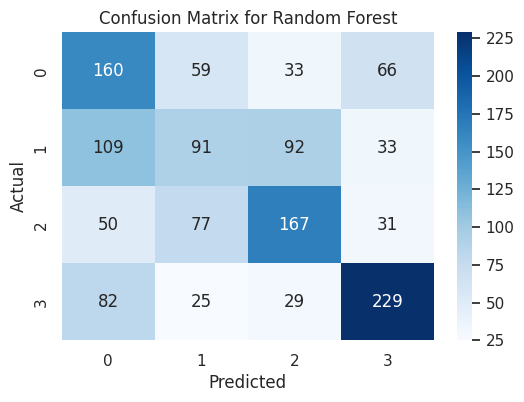


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.48      0.45       318
           1       0.41      0.33      0.37       325
           2       0.53      0.57      0.55       325
           3       0.64      0.65      0.65       365

    accuracy                           0.51      1333
   macro avg       0.50      0.51      0.50      1333
weighted avg       0.51      0.51      0.51      1333



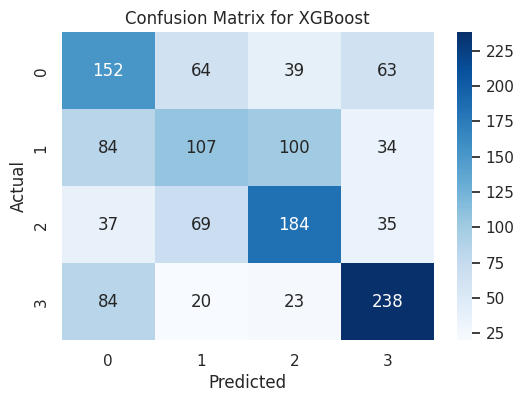

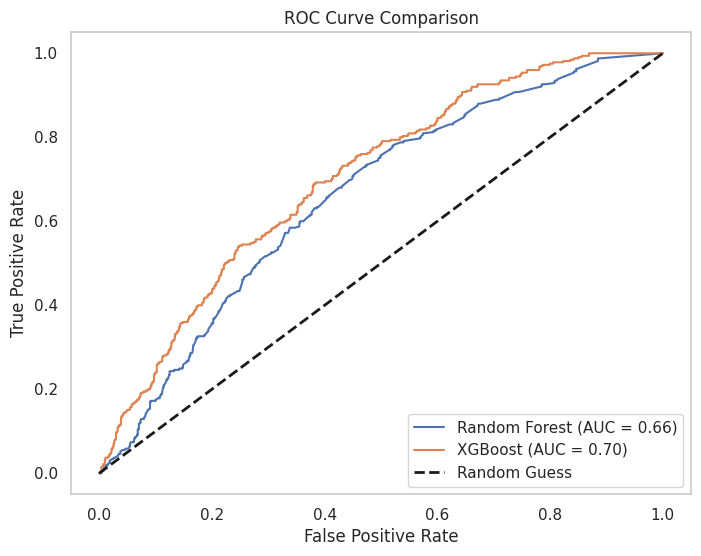

In [30]:
from sklearn.metrics import roc_curve, auc

# Initialize a dictionary to store FPR, TPR, and AUC for each model
roc_data = {}

# Train and evaluate each model
for model, name in zip(model_list, model_names):
    # Fit model on training data
    model.fit(x_train, y_train)

    # Predict probabilities for ROC curve
    y_pred_proba = model.predict_proba(x_test)[:, 1]  # Probabilities for the positive class

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=1)
    roc_auc = auc(fpr, tpr)

    # Store the results
    roc_data[name] = (fpr, tpr, roc_auc)

    # Print Classification Report and Confusion Matrix (as per your code above)
    y_pred = model.predict(x_test)
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f'Confusion Matrix for {name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Plot ROC Curve for both models
plt.figure(figsize=(8, 6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

# Customize the plot
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


Berdasarkan hasil perbandingan kedua model (Random Forest dan XGBoost), model XGBoost menunjukkan performa yang lebih baik secara keseluruhan. Hal ini terlihat dari nilai akurasi yang lebih tinggi pada XGBoost (51%) dibandingkan Random Forest (49%). Selain itu, nilai macro average dan weighted average untuk precision, recall, dan F1-score pada XGBoost masing-masing lebih unggul (0.50-0.51) dibandingkan Random Forest (0.48-0.49).

Secara khusus, XGBoost memiliki keunggulan dalam mendeteksi kelas dengan lebih baik, seperti terlihat dari peningkatan recall pada kelas 1 (dari 0.28 pada Random Forest menjadi 0.33 pada XGBoost) dan kelas 2 (dari 0.51 menjadi 0.57). Hal ini menunjukkan bahwa XGBoost lebih efektif dalam menangkap data yang benar untuk masing-masing kelas. Selain itu, F1-score, yang mencerminkan keseimbangan antara precision dan recall, juga lebih tinggi pada XGBoost di semua kelas.

Dari grafik ROC Curve kita juga bisa lihat bahwa Nilai AUC dari XGBoost lebih besar dibandingkan Nilai AUC dariRandom Forest

Jadi bisa disimpulkan bahwa Model XGBoost lebih baik dibandingka Model Random Forest

# **Fine Tuning**

In [56]:
# Create an XGBoost classifier
xgb_model = XGBClassifier(
    n_estimators=100,          # Number of trees
    learning_rate=0.1,         # Learning rate
    max_depth=6,               # Maximum depth of a tree
    objective='binary:logistic',  # Objective for binary classification
    eval_metric='auc',         # Evaluation metric
    random_state=42            # Random seed for reproducibility
)

In [57]:
# Train the XGBoost model
xgb_model.fit(x_train, y_train)

# Make predictions
y_pred = xgb_model.predict(x_test)
y_pred_prob = xgb_model.predict_proba(x_test)[:, 1]

In [32]:
print("Classification Report:\n",
      classification_report(y_test, y_pred, target_names=['Segment A', 'Segment B', 'Segment C', 'Segment D']))


Classification Report:
               precision    recall  f1-score   support

   Segment A       0.43      0.48      0.45       318
   Segment B       0.41      0.33      0.37       325
   Segment C       0.53      0.57      0.55       325
   Segment D       0.64      0.65      0.65       365

    accuracy                           0.51      1333
   macro avg       0.50      0.51      0.50      1333
weighted avg       0.51      0.51      0.51      1333



Model memiliki akurasi keseluruhan sebesar 55%, dengan rata-rata precision, recall, dan f1-score sekitar 0.53–0.55. Segment C dan Segment D menunjukkan performa terbaik dengan f1-score masing-masing 0.59 dan 0.68, mencerminkan prediksi yang cukup baik untuk kedua segmen tersebut. Namun, Segment A dan Segment B memiliki f1-score lebih rendah, yaitu 0.49 dan 0.37, menunjukkan bahwa model kesulitan dalam mengenali atau memprediksi data dari segmen-segmen ini. Secara keseluruhan, kinerja model dapat dianggap moderat, tetapi masih memerlukan peningkatan, terutama untuk Segment B yang memiliki recall terendah (0.32).

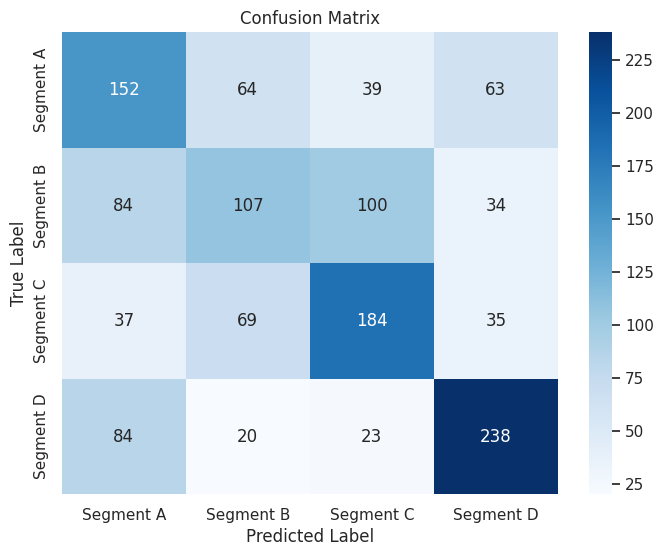

In [31]:
# Confusion Matrix
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Segment A', 'Segment B', 'Segment C', 'Segment D']
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)

# Add labels, title, and axes
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Berdasarkan confusion matrix yang diberikan, model memiliki performa yang bervariasi dalam mengklasifikasikan data ke dalam empat segmen (Segment A, B, C, dan D). Model bekerja cukup baik dalam mengklasifikasikan Segment C dan Segment D, terlihat dari nilai diagonal yang tinggi (184 untuk Segment C dan 238 untuk Segment D), menunjukkan banyak prediksi yang benar. Namun, terdapat sejumlah kesalahan klasifikasi yang signifikan untuk Segment A dan Segment B, misalnya 64 data Segment A diklasifikasikan sebagai Segment B, dan 84 data Segment B salah diklasifikasikan sebagai Segment A. Hal ini mengindikasikan bahwa model mungkin mengalami kesulitan dalam membedakan beberapa kelas, khususnya antara Segment A dan Segment B.

# **Grid Search XGBoost**

In [60]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Inisialisasi model XGBoost
xgboost_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Definisi parameter grid untuk tuning hyperparameter
xgb_params = {
    'n_estimators': [50, 100, 200, 300, 400],
    'max_depth': [1, 3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.2, 0.4, 0.6, 0.8]
}

# Inisialisasi GridSearchCV untuk pencarian parameter terbaik
xgb_grid_search = GridSearchCV(
    estimator=xgboost_model,
    param_grid=xgb_params,
    scoring='f1_macro',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Melatih GridSearchCV dengan data pelatihan
xgb_grid_search.fit(x_train, y_train)

# Menampilkan parameter terbaik dan skor terbaik
print("Optimal Parameters:", xgb_grid_search.best_params_)
print("Best F1 Score:", xgb_grid_search.best_score_)

# Mendapatkan model terbaik dari hasil GridSearchCV
optimal_xgb_model = xgb_grid_search.best_estimator_

# Melakukan prediksi dengan model terbaik pada data uji
y_test_predictions = optimal_xgb_model.predict(x_test)

# Evaluasi performa model terbaik
print("\nEvaluation of the Best XGB Model")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predictions))
print("Classification Report:")
print(classification_report(y_test, y_test_predictions))


Fitting 5 folds for each of 180 candidates, totalling 900 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [05:25:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Optimal Parameters: {'colsample_bytree': 0.4, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Best F1 Score: 0.528567337128578

Evaluation of the Best XGB Model
Confusion Matrix:
[[174  52  38  54]
 [ 84  96 106  39]
 [ 35  52 203  35]
 [ 86  15  11 253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50       318
           1       0.45      0.30      0.36       325
           2       0.57      0.62      0.59       325
           3       0.66      0.69      0.68       365

    accuracy                           0.54      1333
   macro avg       0.53      0.54      0.53      1333
weighted avg       0.54      0.54      0.54      1333



Hasil evaluasi model XGBoost menunjukkan bahwa akurasi keseluruhan adalah 54%, dengan skor rata-rata makro dan berbobot untuk presisi, recall, dan F1 masing-masing sekitar 53%-54%. Ini menunjukkan bahwa model memiliki performa yang moderat, dengan kesulitan dalam membedakan beberapa kelas tertentu. Dari matriks kebingungan, terlihat bahwa model sering salah mengklasifikasikan sampel antar kelas, terutama pada kelas 1, yang memiliki recall dan F1-score terendah (masing-masing 0,30 dan 0,36). Di sisi lain, kelas 3 memiliki performa terbaik dengan skor F1 sebesar 0,68. Ini menunjukkan bahwa model lebih baik dalam mengenali pola dari kelas tertentu, tetapi masih perlu ditingkatkan untuk mencapai keseimbangan performa pada semua kelas.

Setelah dilakukan Gridsearch Accuracy jadi bertambah menjadi 0.54, dari segi macro average juga bertambah, dan yang lainnya juga

# **XGBoost is a boosting algorithm based on tree-based models. It has a mechanism to display 3 types of feature importance: (1) gain, (2) weight, & (3) coverage. Explain each of them**

- Gain mengukur kontribusi rata-rata dari suatu fitur terhadap peningkatan dalam pengurangan loss selama pemisahan di setiap node pohon. Fitur dengan gain tinggi menunjukkan bahwa fitur tersebut memberikan informasi yang signifikan untuk membedakan kelas atau memprediksi nilai target.

- Weight merepresentasikan jumlah total suatu fitur digunakan untuk memisahkan node di semua pohon dalam model. Semakin sering fitur digunakan, semakin besar weight-nya. Namun, weight hanya mempertimbangkan frekuensi tanpa memperhatikan kualitas pemisahannya.

- Coverage menghitung rata-rata proporsi data (observasi) yang dilibatkan di node tempat fitur tersebut digunakan sebagai pemisah. Fitur dengan coverage tinggi cenderung memengaruhi keputusan di lebih banyak observasi dalam dataset.